# 6. Faceting with seaborn

So far in this tutorial we've been plotting data in one (univariate) or two (bivariate) dimensions,
and we've learned how plotting in seaborn works. In this section we'll dive deeper into seaborn by exploring faceting.

Faceting is the act of breaking data variables up across multiple subplots, and combining those subplots into a
single figure. So instead of one bar chart, we might have, say, four, arranged together in a grid.

In this notebook we'll put this technique in action, and see why it's so useful.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
root_path="https://minio.lab.sspcloud.fr/pengfei/diffusion/data_viz"
footballer_input_file=f'{root_path}/footballer.csv'
footballer=pd.read_csv(footballer_input_file,index_col=0,encoding='utf8')

/tmp/ipykernel_4267/2630372508.py:3: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  footballer=pd.read_csv(footballer_input_file,index_col=0,encoding='utf8')


In [4]:
print(footballer.shape)


(17981, 74)


In [5]:
print(footballer.isnull().sum())


Name              0
Age               0
Photo             0
Nationality       0
Flag              0
               ... 
RM             2029
RS             2029
RW             2029
RWB            2029
ST             2029
Length: 74, dtype: int64


In [6]:
print(footballer.head(5))

                Name  Age                                            Photo  \
0  Cristiano Ronaldo   32   https://cdn.sofifa.org/48/18/players/20801.png   
1           L. Messi   30  https://cdn.sofifa.org/48/18/players/158023.png   
2             Neymar   25  https://cdn.sofifa.org/48/18/players/190871.png   
3          L. Suárez   30  https://cdn.sofifa.org/48/18/players/176580.png   
4           M. Neuer   31  https://cdn.sofifa.org/48/18/players/167495.png   

  Nationality                                 Flag  Overall  Potential  \
0    Portugal  https://cdn.sofifa.org/flags/38.png       94         94   
1   Argentina  https://cdn.sofifa.org/flags/52.png       93         93   
2      Brazil  https://cdn.sofifa.org/flags/54.png       92         94   
3     Uruguay  https://cdn.sofifa.org/flags/60.png       92         92   
4     Germany  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club                                   Club Logo   Value  \
0       

In [7]:
print(footballer.Nationality.unique())

['Portugal' 'Argentina' 'Brazil' 'Uruguay' 'Germany' 'Poland' 'Spain'
 'Belgium' 'Chile' 'Croatia' 'Wales' 'Italy' 'Slovenia' 'France' 'Gabon'
 'Sweden' 'Netherlands' 'Denmark' 'Slovakia' 'England' 'Colombia'
 'Austria' 'Greece' 'Czech Republic' 'Costa Rica' 'Armenia'
 'Bosnia Herzegovina' 'Ivory Coast' 'Senegal' 'Switzerland' 'Morocco'
 'Guinea' 'Egypt' 'Algeria' 'Cameroon' 'Serbia' 'Japan' 'Turkey' 'Ecuador'
 'Montenegro' 'Korea Republic' 'Kenya' 'Iceland' 'Mexico' 'Norway'
 'DR Congo' 'Ukraine' 'Russia' 'Finland' 'Republic of Ireland'
 'United States' 'Venezuela' 'Ghana' 'Uzbekistan' 'Nigeria' 'Canada'
 'Paraguay' 'Romania' 'Albania' 'Burkina Faso' 'Cape Verde' 'New Zealand'
 'Northern Ireland' 'Syria' 'Peru' 'Scotland' 'Bulgaria' 'Angola'
 'Australia' 'South Africa' 'Jamaica' 'Tunisia' 'Mozambique' 'Iran' 'Mali'
 'Cuba' 'Hungary' 'Belarus' 'Saudi Arabia' 'China PR' 'Israel' 'Benin'
 'Georgia' 'Dominican Republic' 'Lithuania' 'Kosovo' 'Moldova' 'Bolivia'
 'Togo' 'FYR Macedonia' 'Gui

## 6.1 Facet Grid

The core seaborn utility for faceting is the **FacetGrid**. A FacetGrid is an object which stores some information on
how you want to break up your data visualization.

For example, suppose that we're interested in (as in the previous notebook) comparing strikers and goalkeepers in
some way. To do this, we can create a FacetGrid with our data, telling it that we want to break the Position variable
down by col (column).

Since we're zeroing in on just two positions in particular, this results in a pair of grids ready for us to "do" something with them:


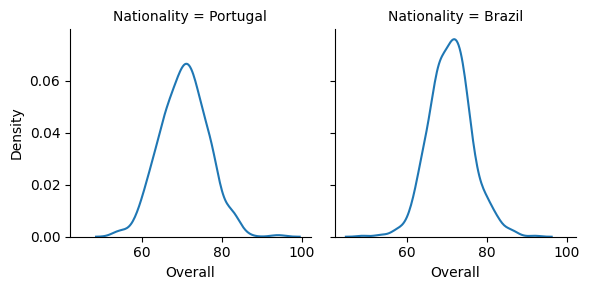

In [8]:
# compare the overall score of players from Portugal and Brazil
df_bra_por = footballer[footballer['Nationality'].isin(['Portugal','Brazil'])]
g = sns.FacetGrid(df_bra_por,col="Nationality")
g.map(sns.kdeplot,"Overall")
plt.show()

In [9]:
chinese_foot = footballer[footballer['Nationality'].isin(['Hong Kong'])]
print(chinese_foot.Overall.describe())

count     1.0
mean     54.0
std       NaN
min      54.0
25%      54.0
50%      54.0
75%      54.0
max      54.0
Name: Overall, dtype: float64


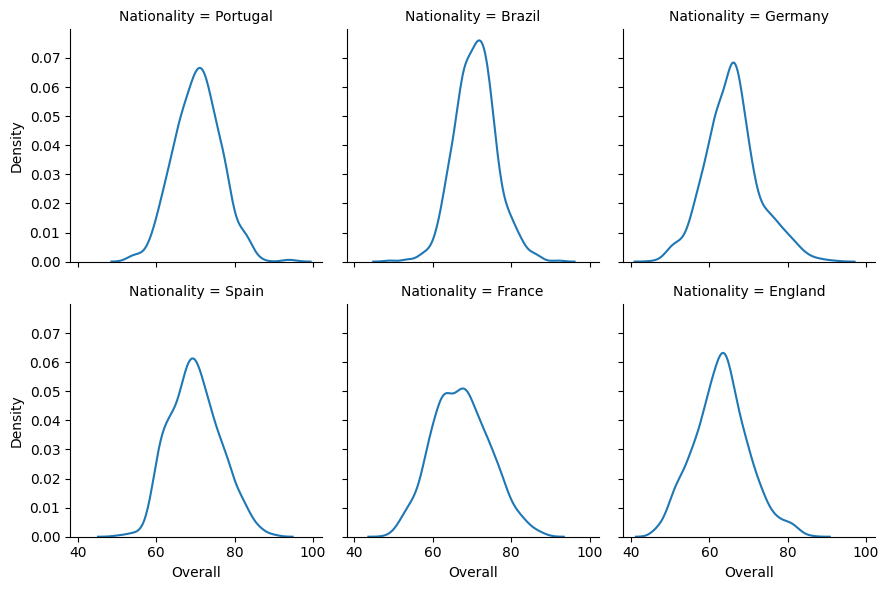

In [10]:
# we can do it for more nationalities
df_six_nation = footballer[footballer['Nationality'].isin(['Portugal','Brazil','France','England','Germany','Spain'])]
gAll=sns.FacetGrid(df_six_nation,col="Nationality",col_wrap=3)
gAll.map(sns.kdeplot,"Overall")
plt.show()

## 6.2 Bivariate facet grid

So far we've been dealing exclusively with one col (column) of data in the **facet grid**. We can also add rows.

For example, suppose we're interested in comparing the talent distribution for across rival clubs `Real Madrid`, `Atletico Madrid`, and `FC Barcelona`.

As the plot below demonstrates, we can achieve this by passing `row=Nationality` and `col=Club` parameters into the plot.


/home/pliu/.cache/pypoetry/virtualenvs/data-vizualization-with-python-2AdhT0-c-py3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


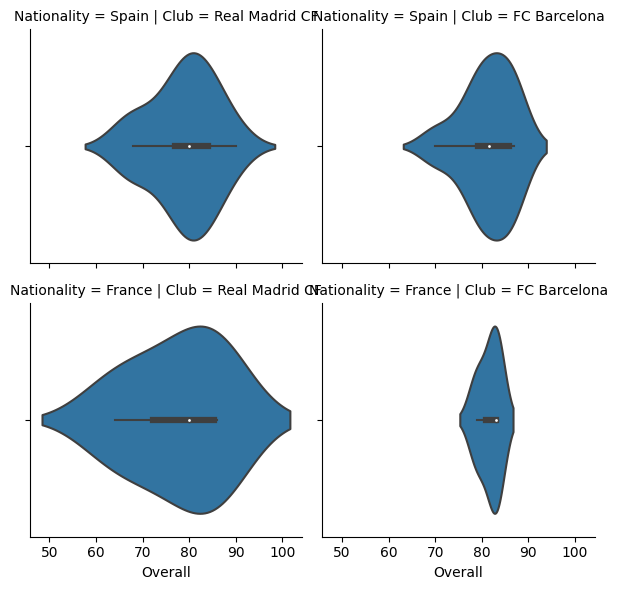

In [11]:
# bivariate facet grid without order
df_fr_sp = footballer[footballer['Nationality'].isin(['France','Spain'])]
df_club = df_fr_sp[df_fr_sp['Club'].isin(['Real Madrid CF', 'FC Barcelona'])]
#
g_club= sns.FacetGrid(df_club,row="Nationality",col="Club")
g_club.map(sns.violinplot,"Overall")
plt.show()

##6.3 Bivariate facet grid with order

FacetGrid orders the subplots effectively arbitrarily by default. To specify your own ordering explicitly, pass the appropriate argument to the **row_order** and **col_order** parameters.


/home/pliu/.cache/pypoetry/virtualenvs/data-vizualization-with-python-2AdhT0-c-py3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


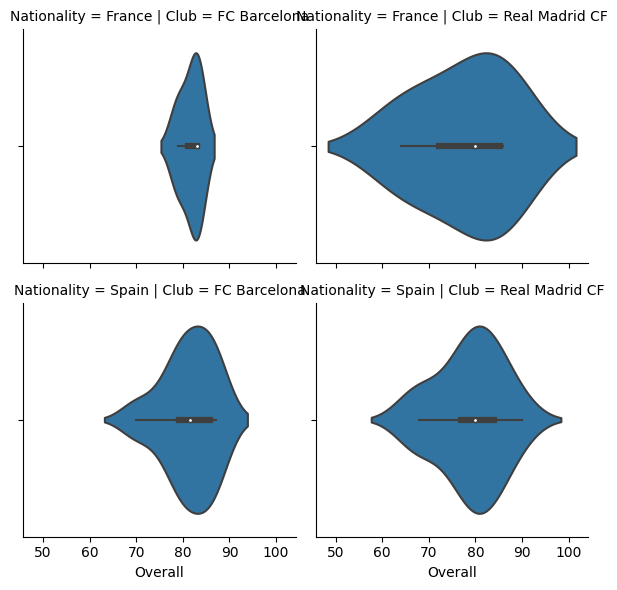

In [12]:
g_club_order=sns.FacetGrid(df_club,row="Nationality",col="Club", row_order=['France','Spain'],
                  col_order=['FC Barcelona', 'Real Madrid CF'])
g_club_order.map(sns.violinplot,"Overall")
plt.show()

Why facet?

In a nutshell, faceting is the easiest way to make your data visualization multivariate.

Faceting is multivariate because after laying out one (categorical) variable in the rows and another (categorical)
variable in the columns, we are already at two variables accounted for before regular plotting has even begun.

And faceting is easy because transitioning from plotting a kdeplot to gridding them out, as here, is very simple.
It doesn't require learning any new visualization techniques. The limitations are the same ones that held for the
plots you use inside.

Faceting does have some important limitations, however. It can only be used to break data out across singular or
paired categorical variables with very low numeracy—any more than five or so dimensions in the grid, and the plots
become too small (or involve a lot of scrolling). Additionally, it involves choosing (or letting Python) an order to plot in, but with nominal categorical variables that choice is distractingly arbitrary.

Nevertheless, faceting is an extremely useful and applicable tool to have in your toolbox.

## 6.4 Pair plot

Now that we understand faceting, it's worth taking a quick once-over of the seaborn **pairplot** function.

**pairplot** is a very useful and widely used seaborn method for faceting variables (as opposed to variable values).
You pass it a pandas DataFrame in the right shape, and it returns you a gridded result of your variable values:


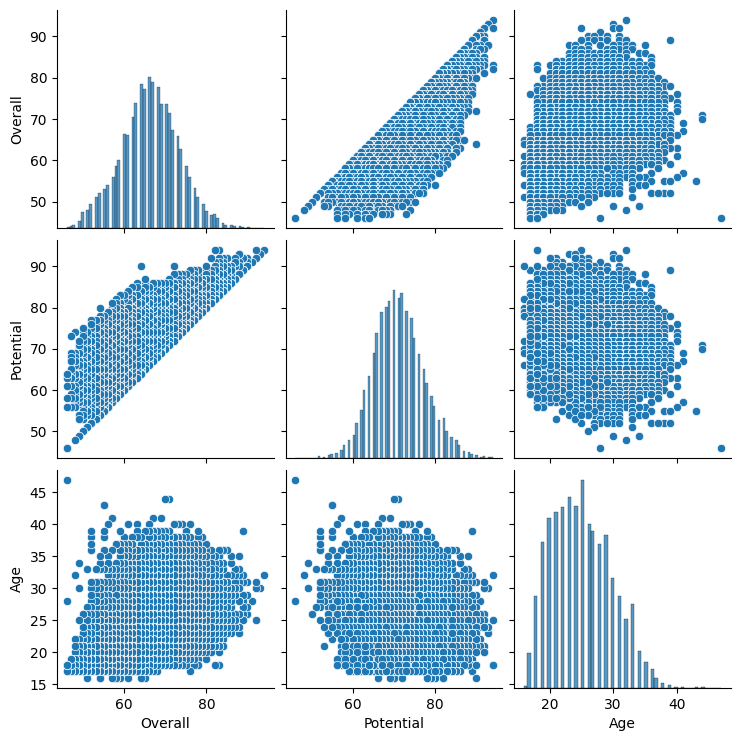

In [13]:
sns.pairplot(footballer[['Overall','Potential','Age']])
plt.show()

By default, **pairplot** will return scatter plots in the main entries and a histogram in the diagonal. **pairplot** is oftentimes the first thing that a data scientist will throw at their data, and it works fantastically well in that capacity, even if sometimes the scatter-and-histogram approach isn't quite
appropriate, given the data types.

## 6.5 Exercise

As in previous notebooks, let's now test ourselves by answering some questions about the plots we've used in this section.

1. Suppose that we create an n by n FacetGrid. How big can n get?

You should try to keep your grid variables down to five or so. Otherwise the plots get too small.

3. What are the two things about faceting which make it appealing?
It's (1) a multivariate technique which (2) is very easy to use.

4. When is pairplot most useful?
Pair plots are most useful when just starting out with a dataset, because they help contextualize relationships within it.


In [14]:
pokemon_input_file=f'{root_path}/Pokemon.csv'
pokemon=pd.read_csv(pokemon_input_file,index_col=0)

## 6.5.1 facet grid with row as Legendary . Compare attack values between legendary and non-legendary


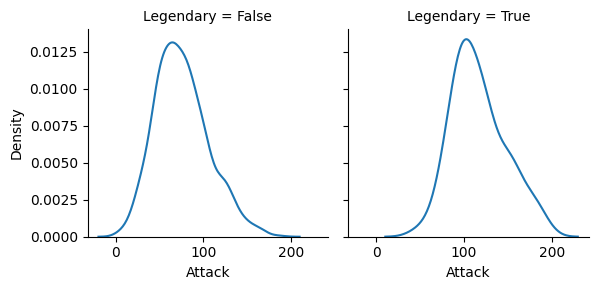

In [16]:
g_pokemon=sns.FacetGrid(pokemon,col="Legendary")
g_pokemon.map(sns.kdeplot,"Attack")
plt.show()

## 6.5.2 Compare attack values group by legendary and generation

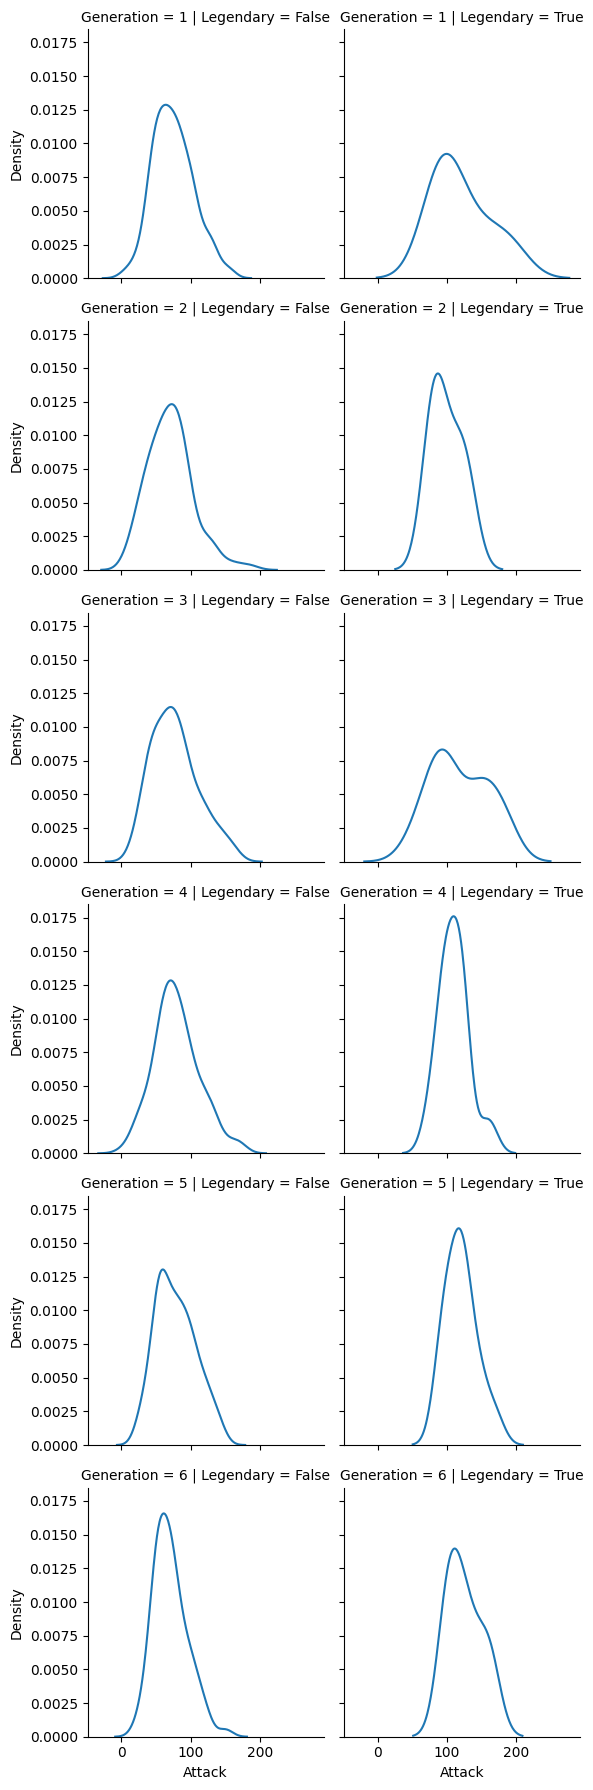

In [17]:
gLG = sns.FacetGrid(pokemon,row="Generation",col="Legendary")
gLG.map(sns.kdeplot,"Attack")
plt.show()

## 6.5.3. pairplot on HP, attack, defense

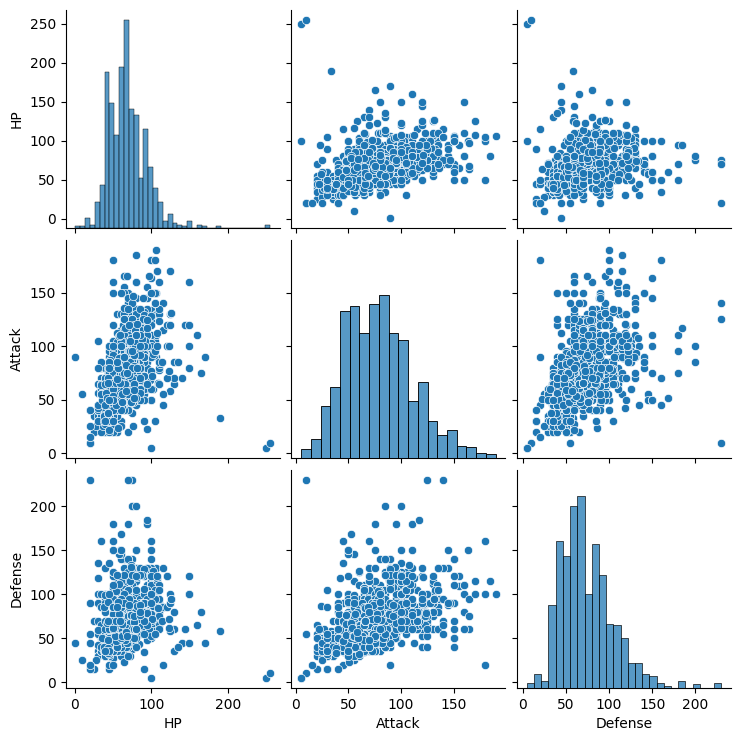

In [18]:
sns.pairplot(pokemon[["HP", "Attack", "Defense"]])
plt.show()

# Conclusion

In this notebook we explored **FacetGrid** and **pairplot**, two seaborn facilities for faceting your data, and discussed why faceting is so useful in a broad range of cases.

This technique is our first dip into multivariate plotting, an idea that we will explore in more depth with two other approaches in the next section.